# Exploratory Data Analysis

### Importing the Data and Creating a List of Unique Years

In [132]:
import pandas as pd

data = pd.read_csv("clean_data.csv", encoding = "Windows-1252")

# Gets the average of a list
def avg(x):
    if len(x) == 0:
        return 0
    else:
        return sum(x) / len(x)

# Removes rows that don't have a valid date entry
data = data[data.year != "1940-1955"]
    
# Creates a list of unique years
years = data["year"].apply(int).to_list()
unique_years = list(set(years))

data.head()

,case_name,docket_num,first_party,second_party,facts,first_party_won,issue_area,ideologies,avg_ideology,year
0,Roe v. Wade,70-18,Jane Roe,Henry Wade,"In 1970, Jane Roe (a fictional name used in co...",True,Unknown,"[-7.602, 0.109, -1.072, -1.174, 0.664, 2.439, ...",0.016778,1971
1,Stanley v. Illinois,70-5014,"Peter Stanley, Sr.",Illinois,Joan Stanley had three children with Peter Sta...,True,Civil Rights,"[-7.602, 0.109, -1.072, -1.174, 0.664, 2.439, ...",0.016778,1971
2,Giglio v. United States,70-29,John Giglio,United States,John Giglio was convicted of passing forged mo...,True,Due Process,"[-7.602, 0.109, -1.072, -1.174, 0.664, 2.439, ...",0.016778,1971
3,Reed v. Reed,70-4,Sally Reed,Cecil Reed,"The Idaho Probate Code specified that ""males m...",True,Civil Rights,"[-7.602, 0.109, -1.072, -1.174, 0.664, 2.439, ...",-0.703571,1971
4,Miller v. California,70-73,Marvin Miller,California,"Miller, after conducting a mass mailing campai...",True,First Amendment,"[2.439, -7.602, -1.174, 0.109, 0.664, -1.072, ...",0.016778,1971


### Change in Average Ideologies Overtime

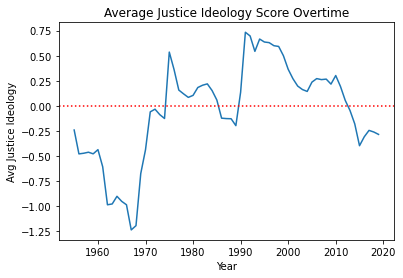

In [133]:
import matplotlib.pylab as plt

# Creating a dictionary with values for each unique year
ideologies_dict = {}

for year in unique_years:
    ideologies_dict[year] = []

# Assigning values to the dictionary
for (avg_ideology, year) in zip(data["avg_ideology"].to_list(), years):
    ideologies_dict[year].append(avg_ideology)

# Averaging the values in the dictionary
ideologies_dict = {k: avg(v) for k, v in ideologies_dict.items()}
    
# Plotting the data
plt.plot(ideologies_dict.keys(), ideologies_dict.values())
plt.xlabel("Year")
plt.ylabel("Avg Justice Ideology")
plt.title("Average Justice Ideology Score Overtime")
plt.axhline(y = 0, color = "r", linestyle = ":")
plt.show()

### Change in Median Justice Ideology Overtime

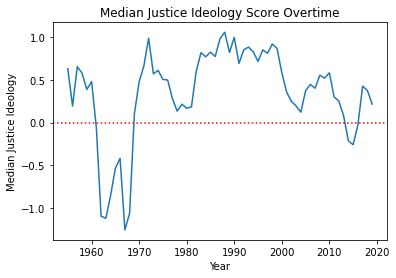

In [134]:
import statistics

# Creating a dictionary with values for each unique year
median_ideologies_dict = {}

for year in unique_years:
    median_ideologies_dict[year] = []

for (ideology_list, year) in zip(data["ideologies"].to_list(), years):
    ideology_nums = eval(ideology_list)
    if len(ideology_nums) == 9:
        median_ideologies_dict[year].append(statistics.median(ideology_nums))

# Averaging the values in the dictionary
median_ideologies_dict = {k: avg(v) for k, v in median_ideologies_dict.items()}

# Plotting the data
plt.plot(median_ideologies_dict.keys(), median_ideologies_dict.values())
plt.xlabel("Year")
plt.ylabel("Median Justice Ideology")
plt.title("Median Justice Ideology Score Overtime")
plt.axhline(y = 0, color = "r", linestyle = ":")
plt.show()

### What Percentage of Cases Won?

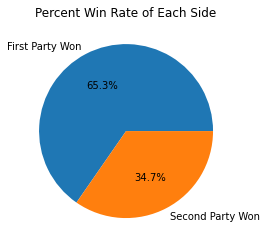

In [135]:
# Getting the first party win percent
wins = data["first_party_won"].apply(int).to_list()
win_percent = avg(wins)

# Creating the figure lists
outcomes = ["First Party Won", "Second Party Won"]
outcome_stats = [win_percent, 1 - win_percent]

# Creating the pie chart
plt.pie(outcome_stats, labels = outcomes, autopct = "%1.1f%%")
plt.title("Percent Win Rate of Each Side")
plt.show()